In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os, shutil
import time
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)
from keras.models import load_model

Using TensorFlow backend.


In [5]:
balanced_df = pd.read_csv('balanced_df.csv')

## Removing EXIF Data From Pictures

In [3]:
from piexif import remove

In [4]:
remove(balanced_df.full_path[0])

In [5]:
messedup_imgs = []
for img in balanced_df.full_path:
    try:
        remove(img)
    except:
        messedup_imgs.append(img)
        print(img)

data/wiki/18/12101218_1944-03-01_2005.jpg
data/wiki/83/1510283_1945-10-12_2008.jpg
data/wiki/24/75124_1890-07-30_1953.jpg
data/wiki/27/8619027_1947-09-17_2007.jpg
data/wiki/86/2915386_1953-04-06_2013.jpg
data/wiki/08/11200508_1948-03-10_2010.jpg
data/wiki/88/1324588_1952-11-20_2013.jpg
data/wiki/88/44233488_1946-12-20_2010.jpg
data/wiki/20/433020_1948-03-17_2011.jpg
data/wiki/16/39328616_1940-09-07_2004.jpg
data/wiki/99/2141499_1952-10-05_2013.jpg
data/wiki/11/4847711_1947-07-24_2009.jpg
data/wiki/59/2257159_1947-09-20_2008.jpg
data/wiki/56/1758956_1885-06-21_1949.jpg
data/wiki/50/206050_1949-03-24_2012.jpg
data/wiki/11/10745111_1950-11-21_2012.jpg
data/wiki/07/31768807_1921-05-21_1981.jpg
data/wiki/93/18750993_1949-07-01_2009.jpg
data/wiki/77/2872077_1944-10-20_2007.jpg
data/wiki/04/10867904_1946-04-22_2008.jpg
data/wiki/95/30862895_1891-09-12_1951.jpg
data/wiki/98/2886798_1954-02-09_2015.jpg
data/wiki/18/30965418_1906-12-08_1970.jpg
data/wiki/60/34939260_1954-10-18_2015.jpg
data/wiki

data/wiki/38/872238_1929-04-01_1970.jpg
data/wiki/80/16380_1918-03-05_1962.jpg
data/wiki/93/6895093_1970-11-11_2013.jpg
data/wiki/58/46347358_1919-12-14_1942.jpg
data/wiki/52/10377952_1942-01-01_1962.jpg
data/wiki/19/23710819_1988-09-23_2012.jpg
data/wiki/39/7660239_1987-01-18_2009.jpg
data/wiki/45/41325045_1947-04-14_1968.jpg
data/wiki/20/46347920_1920-08-04_1942.jpg
data/wiki/04/17685304_1991-04-18_2011.jpg
data/wiki/33/36694233_1993-09-16_2014.jpg
data/wiki/76/21537776_1989-10-29_2010.jpg
data/wiki/03/43595503_1946-01-31_1968.jpg
data/wiki/36/39961436_1925-01-26_1948.jpg
data/wiki/90/34026190_1989-05-24_2013.jpg
data/wiki/24/20134324_1926-08-12_1949.jpg
data/wiki/85/2954585_1933-08-22_1956.jpg
data/wiki/57/40110257_1988-03-14_2010.jpg
data/wiki/67/1404167_1986-01-23_2007.jpg
data/wiki/39/7783639_1934-10-27_1958.jpg
data/wiki/27/13818927_1946-01-26_1966.jpg
data/wiki/27/18363927_1991-08-30_2012.jpg
data/wiki/36/31370636_1917-07-09_1940.jpg
data/wiki/67/14349067_1943-10-18_1964.jpg
da

In [15]:
messedup_indices = []
for img in messedup_imgs:
    messedup_indices.append(balanced_df.loc[balanced_df.full_path == img].index[0])

In [20]:
balanced_df.drop(index = messedup_indices, inplace= True)

In [21]:
balanced_df.to_csv("balanced_df.csv", index= False)

In [22]:
balanced_df.shape

(85213, 10)

## Preprocessing + Training

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(balanced_df['full_path'], 
                                                    balanced_df['age_range'], 
                                                    test_size = 0.20,
                                                    random_state = 42, 
                                                    stratify = balanced_df['age_range'],
                                                   )

In [7]:
training_dict = {'full_path': X_train, 'age_range': y_train}
testing_dict = {'full_path': X_test, 'age_range': y_test}
training_df = pd.DataFrame(training_dict)
testing_df = pd.DataFrame(testing_dict)

In [8]:
datagen = ImageDataGenerator(rescale = 1./255., validation_split= 0.1) 
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [9]:
#Creating seperate generators for testing, validation, and testing 
train_generator = datagen.flow_from_dataframe(training_df, 
                                              x_col= 'full_path',
                                              y_col= "age_range",
                                              target_size = (160, 160),
                                              batch_size = 32,
                                              seed = 123,
                                              subset = 'training',
                                              drop_duplicates= True
                                              )
                                             

validation_generator = datagen.flow_from_dataframe(training_df, 
                                                   x_col= 'full_path',
                                                   y_col = 'age_range',
                                                   target_size = (160, 160),
                                                   #batch_size = 240,
                                                   batch_size= 39,
                                                   subset = 'validation',
                                                   seed = 123,
                                                   drop_duplicates= True
                                                   #shuffle= False
                                                   
                                                   )



test_generator = test_datagen.flow_from_dataframe(testing_df,
                                                  x_col= 'full_path',
                                                  y_col= 'age_range',
                                                  target_size = (160, 160),
                                                  shuffle = False,
                                                  batch_size = 36,
                                                  seed = 123)

Found 58852 images belonging to 13 classes.
Found 6539 images belonging to 13 classes.
Found 16812 images belonging to 13 classes.


In [10]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, Activation, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam, sgd
from keras.activations import relu, tanh, sigmoid



In [45]:
from keras.applications import VGG16
cnn_base_vgg16 = VGG16(include_top = False, weights = 'imagenet', input_shape= (160, 160, 3))

In [46]:
complete_model = cnn_base_vgg16.output
complete_model = GlobalAveragePooling2D()(complete_model)

complete_model = Dense(4096)(complete_model)
complete_model = BatchNormalization()(complete_model)
complete_model = Activation('tanh')(complete_model)
complete_model = Dropout(rate = 0.4)(complete_model)


complete_model = Dense(4096)(complete_model)
complete_model = BatchNormalization()(complete_model)
complete_model = Activation('tanh')(complete_model)
complete_model = Dropout(rate = 0.4)(complete_model)

complete_model = Dense(2560)(complete_model)
complete_model = BatchNormalization()(complete_model)
complete_model = Activation('tanh')(complete_model)


# complete_model = Dense(500)(complete_model)
# complete_model = BatchNormalization()(complete_model)
# complete_model = Activation('tanh')(complete_model)

preds = Dense(13, activation= "softmax")(complete_model) #Final layer with softmax activation

In [47]:
model = Model(inputs = cnn_base_vgg16.input, outputs = preds)

In [48]:
for layer in model.layers[:19]:
    layer.trainable = False
for layer in model.layers[19:]:
    layer.trainable = True

In [49]:
sgd = optimizers.SGD(lr=0.01, momentum= 0.0 , decay=0.0, nesterov=False)

In [50]:
model.compile(optimizer = sgd , loss = 'categorical_crossentropy', metrics = ['acc'])

In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience= 4, verbose= 1),
             ModelCheckpoint(filepath= 'model2.h5', monitor = 'val_acc', save_best_only= True)]

In [52]:
import datetime
t1 = datetime.datetime.now()

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs= 50,
                    verbose= 1,
                    callbacks= callbacks
)

t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/50
1839/1839 [==============================] - 382s 208ms/step - loss: 2.6591 - acc: 0.1167 - val_loss: 2.5185 - val_acc: 0.1300
Epoch 2/50
1839/1839 [==============================] - 392s 213ms/step - loss: 2.5111 - acc: 0.1341 - val_loss: 2.5455 - val_acc: 0.1291
Epoch 3/50
1839/1839 [==============================] - 367s 200ms/step - loss: 2.4627 - acc: 0.1457 - val_loss: 2.4900 - val_acc: 0.1437
Epoch 4/50
1839/1839 [==============================] - 370s 201ms/step - loss: 2.4434 - acc: 0.1481 - val_loss: 2.4927 - val_acc: 0.1405
Epoch 5/50
1839/1839 [==============================] - 372s 202ms/step - loss: 2.4291 - acc: 0.1549 - val_loss: 2.4610 - val_acc: 0.1389
Epoch 6/50
1839/1839 [==============================] - 369s 201ms/step - loss: 2.4189 - acc: 0.1560 - val_loss: 2.5061 - val_acc: 0.1428
Epoch 7/50
1839/1839 [==============================] - 371s 202ms/step - loss: 2.4035 - acc: 0.1630 - val_loss: 2.4820 - val_acc: 0.1374
Epoch 00007: early stopping
0:43:4

In [34]:
def plot_accuracy():
    plt.title('Accuracy vs # of Epochs')
    plt.xlabel("# of Epochs")
    plt.ylabel('Percent Accuracy')

    plt.plot(model.history.history['val_acc'], 'b', label = "Validation Accuracy")
    plt.plot(model.history.history['acc'], 'r', label = "Training Accuracy")
    plt.legend()
    plt.show()

def plot_loss():
    plt.title('Loss')
    plt.xlabel("# of Epochs")
    plt.ylabel('Loss')

    plt.plot(model.history.history['val_loss'], 'b', label = "Validation Loss")
    plt.plot(model.history.history['loss'], 'r', label = "Loss")
    plt.legend()
    plt.show()

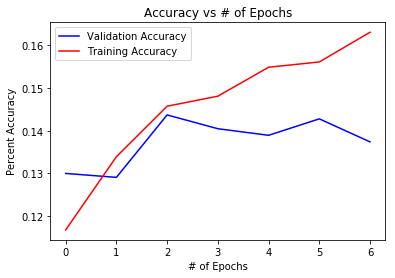

In [54]:
plot_accuracy()

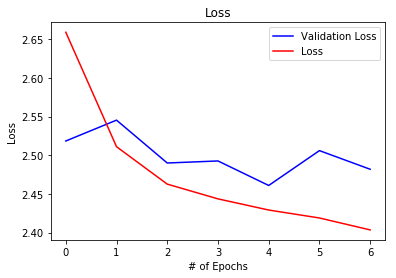

In [55]:
plot_loss()

### Running Model Again But Increasing Patience in Optimizer

In [56]:
model = load_model("model2.h5")
model.compile(optimizer = sgd , loss = 'categorical_crossentropy', metrics = ['acc'])

In [58]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience= 12, verbose= 1),
             ModelCheckpoint(filepath= 'model2.h5', monitor = 'val_acc', save_best_only= True)]

In [9]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

In [59]:
import datetime
t1 = datetime.datetime.now()



model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs= 50,
                    verbose= 1,
                    callbacks= callbacks
)

t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/50
1839/1839 [==============================] - 356s 194ms/step - loss: 2.4452 - acc: 0.1470 - val_loss: 2.5148 - val_acc: 0.1345
Epoch 2/50
1839/1839 [==============================] - 375s 204ms/step - loss: 2.4282 - acc: 0.1532 - val_loss: 2.4778 - val_acc: 0.1365
Epoch 3/50
1839/1839 [==============================] - 383s 208ms/step - loss: 2.4180 - acc: 0.1571 - val_loss: 2.4949 - val_acc: 0.1403
Epoch 4/50
1839/1839 [==============================] - 382s 208ms/step - loss: 2.4086 - acc: 0.1613 - val_loss: 2.4811 - val_acc: 0.1391ac
Epoch 5/50
1839/1839 [==============================] - 385s 209ms/step - loss: 2.3980 - acc: 0.1633 - val_loss: 2.4822 - val_acc: 0.1432
Epoch 6/50
1839/1839 [==============================] - 366s 199ms/step - loss: 2.3894 - acc: 0.1665 - val_loss: 2.4698 - val_acc: 0.1423
Epoch 7/50
1839/1839 [==============================] - 371s 202ms/step - loss: 2.3802 - acc: 0.1706 - val_loss: 2.4820 - val_acc: 0.1415
Epoch 8/50
1839/1839 [==========

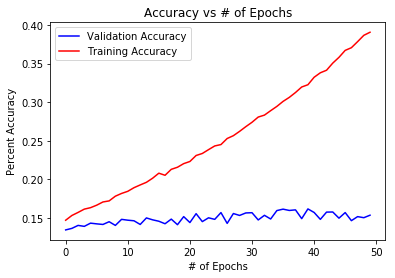

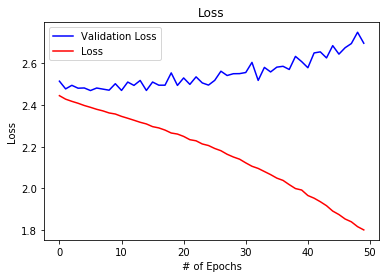

In [64]:
plot_accuracy()
plot_loss()

In [60]:
model.save('model2.h5')

In [36]:
#model = load_model('best_model.h5')

def predictoneimage_cnn(model, path):
    img = load_img(path, target_size=(160, 160))
    print(type(img))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    #class_dict = {}
    #for i in train_generator.classes:
    #   class_dict[k] = predict[0][v] * 100
    return predict

In [56]:
train_generator.class_indices

{'[10 - 15)': 0,
 '[15 - 20)': 1,
 '[20 - 25)': 2,
 '[25 - 30)': 3,
 '[30 - 35)': 4,
 '[35 - 40)': 5,
 '[40 - 45)': 6,
 '[45 - 50)': 7,
 '[50 - 55)': 8,
 '[55 - 60)': 9,
 '[60 - 65)': 10,
 '[65 - 70)': 11,
 '[70 - 80)': 12}

<class 'PIL.Image.Image'>


array([[0.01179375, 0.01329555, 0.01591369, 0.10414876, 0.01113929,
        0.12805548, 0.09196487, 0.26168966, 0.13535947, 0.05389682,
        0.10059227, 0.02619558, 0.04595485]], dtype=float32)

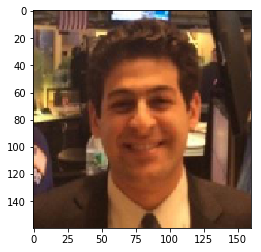

In [63]:
predictoneimage_cnn(model, 'alex_test.JPG')

## Evaluating Model with Test Set

In [7]:
model = load_model('model2.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [14]:
model.evaluate_generator(test_generator, steps= STEP_SIZE_TEST, verbose= 1)
#Test set has an accuracy of 16.7%

467/467 [==============================] - 86s 184ms/step


[2.6335462216902084, 0.1673209644431284]

### Despite Model Having Poor Validation and Test Accuracy, Will Continue to Train the Model because dataset may be highly variable

In [18]:
sgd = optimizers.SGD(lr=0.01, momentum= 0.0 , decay=0.0, nesterov=False)
model = load_model("model2.h5")
model.compile(optimizer = sgd , loss = 'categorical_crossentropy', metrics = ['acc'])

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience= 10, verbose= 1),
             ModelCheckpoint(filepath= 'model2.h5', monitor = 'val_acc', save_best_only= True)]

In [20]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

In [21]:
import datetime
t1 = datetime.datetime.now()



model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs= 30,
                    verbose= 1,
                    callbacks= callbacks
)

t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/30
1839/1839 [==============================] - 464s 252ms/step - loss: 1.7769 - acc: 0.3987 - val_loss: 2.6865 - val_acc: 0.1598
Epoch 2/30
1839/1839 [==============================] - 344s 187ms/step - loss: 1.7509 - acc: 0.4087 - val_loss: 2.7044 - val_acc: 0.1602
Epoch 3/30
1839/1839 [==============================] - 360s 196ms/step - loss: 1.7245 - acc: 0.4200 - val_loss: 2.7265 - val_acc: 0.1545
Epoch 4/30
1839/1839 [==============================] - 342s 186ms/step - loss: 1.7054 - acc: 0.4249 - val_loss: 2.8024 - val_acc: 0.1482
Epoch 5/30
1839/1839 [==============================] - 343s 186ms/step - loss: 1.6935 - acc: 0.4262 - val_loss: 2.7981 - val_acc: 0.1554
Epoch 6/30
1839/1839 [==============================] - 346s 188ms/step - loss: 1.6673 - acc: 0.4375 - val_loss: 2.8525 - val_acc: 0.1506
Epoch 7/30
1839/1839 [==============================] - 353s 192ms/step - loss: 1.6346 - acc: 0.4502 - val_loss: 2.7945 - val_acc: 0.1595
Epoch 8/30
1839/1839 [============

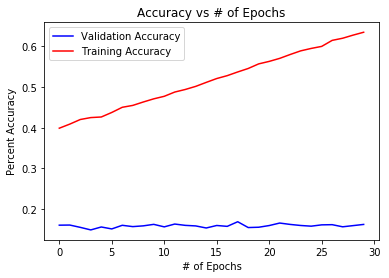

In [35]:
plot_accuracy() #Validation accuracy has not improved

### Predictions

In [11]:
classes = []
for indic in train_generator.class_indices:
    classes.append(indic)

In [12]:
def mapping_ages(predict_array):
    from collections import Counter
    c = 0
    new_dict = {}
    for age_range in classes:
        new_dict.update({age_range: predict_array[0][c]*100})
        c = c + 1
    #return new_dict
    k = Counter(new_dict)
    return k.most_common(3)

In [13]:
#model = load_model('best_model.h5')
#Updated predictoneimage function to map to classes as well 
def predictoneimage_cnn(model, path):
    img = load_img(path, target_size=(160, 160))
    print("Age Range Percentages:")
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    return mapping_ages(predict)
    

Age Range Percentages:


[('[45 - 50)', 59.73045825958252),
 ('[35 - 40)', 8.879891782999039),
 ('[25 - 30)', 8.422891050577164)]

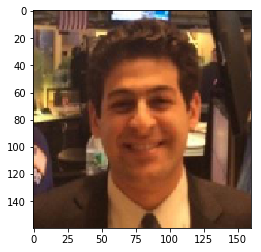

In [208]:

predictoneimage_cnn(model,"alex_test.JPG")

Age Range Percentages:


[('[25 - 30)', 39.1895055770874),
 ('[45 - 50)', 15.611983835697174),
 ('[30 - 35)', 12.218454480171204)]

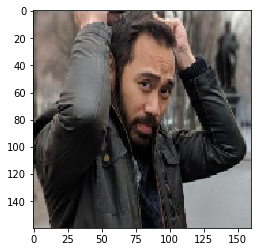

In [207]:
predictoneimage_cnn(model, "fhel_test.JPG")

Age Range Percentages:


[('[25 - 30)', 36.88055872917175),
 ('[20 - 25)', 22.382329404354095),
 ('[35 - 40)', 14.49415236711502)]

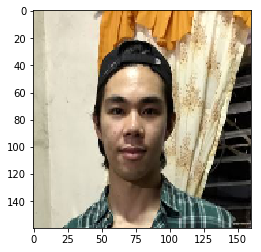

In [206]:
predictoneimage_cnn(model, "jeus_test.JPG")

Age Range Percentages:


[('[35 - 40)', 28.11358869075775),
 ('[40 - 45)', 25.895202159881592),
 ('[55 - 60)', 23.87033849954605)]

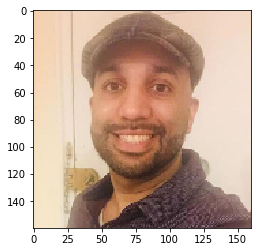

In [107]:
predictoneimage_cnn(model, 'ullises_test.JPG')

Age Range Percentages:


[('[20 - 25)', 63.91708254814148),
 ('[25 - 30)', 11.98938637971878),
 ('[35 - 40)', 8.709543198347092)]

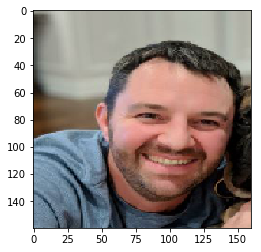

In [205]:
predictoneimage_cnn(model, 'denis_test.JPG')

Age Range Percentages:


[('[30 - 35)', 36.27767860889435),
 ('[45 - 50)', 11.643803119659424),
 ('[50 - 55)', 9.956344217061996)]

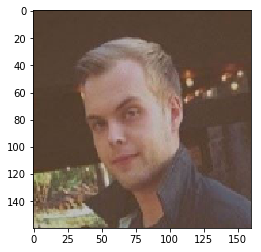

In [204]:
predictoneimage_cnn(model, 'austin_test.JPG')

Age Range Percentages:


[('[15 - 20)', 67.3662543296814),
 ('[10 - 15)', 7.614748179912567),
 ('[55 - 60)', 6.512116640806198)]

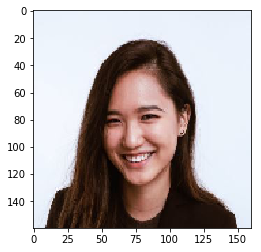

In [203]:
predictoneimage_cnn(model, 'yish_test.JPG')

Age Range Percentages:


[('[25 - 30)', 19.983574748039246),
 ('[40 - 45)', 17.03135371208191),
 ('[30 - 35)', 15.067753195762634)]

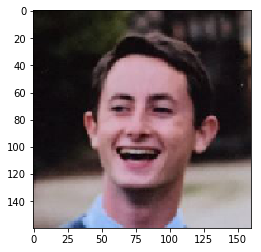

In [202]:
predictoneimage_cnn(model, 'rob_test.JPG')

Age Range Percentages:


[('[35 - 40)', 44.85017955303192),
 ('[60 - 65)', 15.467946231365204),
 ('[20 - 25)', 8.957299590110779)]

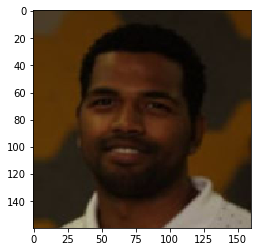

In [209]:
predictoneimage_cnn(model, 'sean_test.JPG')

Age Range Percentages:


[('[25 - 30)', 77.86152958869934),
 ('[20 - 25)', 11.460825055837631),
 ('[45 - 50)', 2.9809780418872833)]

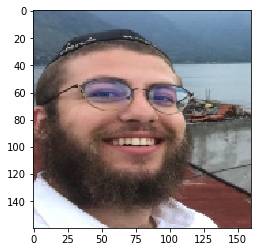

In [24]:
predictoneimage_cnn(model, 'menachi_test.JPG')

Age Range Percentages:


[('[20 - 25)', 31.887197494506836),
 ('[30 - 35)', 28.986632823944092),
 ('[25 - 30)', 18.46822202205658)]

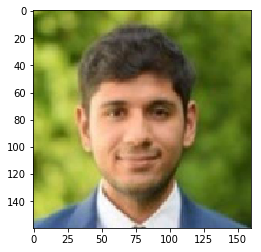

In [200]:
predictoneimage_cnn(model, 'akshay_test.JPG')

Age Range Percentages:


[('[30 - 35)', 26.823651790618896),
 ('[50 - 55)', 25.891771912574768),
 ('[25 - 30)', 25.87115168571472)]

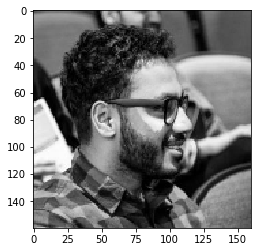

In [115]:
predictoneimage_cnn(model, 'atiar_test.JPG')

Age Range Percentages:


[('[40 - 45)', 40.531277656555176),
 ('[55 - 60)', 22.8742316365242),
 ('[70 - 80)', 8.211179077625275)]

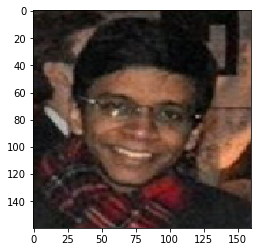

In [116]:
predictoneimage_cnn(model, 'anmol_test.JPG')

Age Range Percentages:


[('[35 - 40)', 49.21463429927826),
 ('[30 - 35)', 26.40824019908905),
 ('[20 - 25)', 11.480925977230072)]

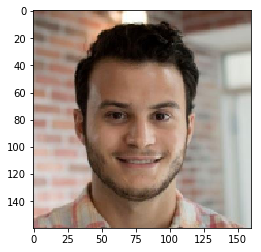

In [196]:
predictoneimage_cnn(model, 'david_test.JPG')

Age Range Percentages:


[('[45 - 50)', 30.12433648109436),
 ('[30 - 35)', 24.705368280410767),
 ('[25 - 30)', 15.368461608886719)]

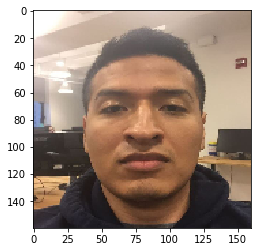

In [195]:
predictoneimage_cnn(model, 'miguel_test.JPG')

Age Range Percentages:


[('[35 - 40)', 28.59611213207245),
 ('[25 - 30)', 19.119344651699066),
 ('[30 - 35)', 10.715295374393463)]

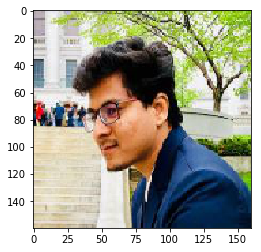

In [194]:
predictoneimage_cnn(model, 'abhijeet_test.JPG')

Age Range Percentages:


[('[20 - 25)', 26.819685101509094),
 ('[25 - 30)', 21.436992287635803),
 ('[15 - 20)', 20.460189878940582)]

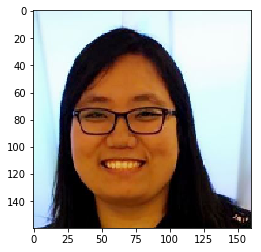

In [193]:
predictoneimage_cnn(model, 'amy_test.JPG')

Age Range Percentages:


[('[15 - 20)', 22.028934955596924),
 ('[55 - 60)', 18.22749525308609),
 ('[40 - 45)', 18.012788891792297)]

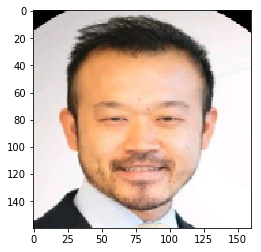

In [192]:
predictoneimage_cnn(model, 'adam_test.JPG')

Age Range Percentages:


[('[60 - 65)', 28.929319977760315),
 ('[55 - 60)', 25.240665674209595),
 ('[25 - 30)', 9.08309742808342)]

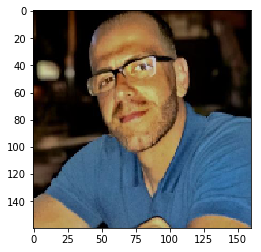

In [191]:
predictoneimage_cnn(model, 'eldebak_test.JPG')

Age Range Percentages:


[('[25 - 30)', 64.18967247009277),
 ('[30 - 35)', 14.178556203842163),
 ('[20 - 25)', 12.001492828130722)]

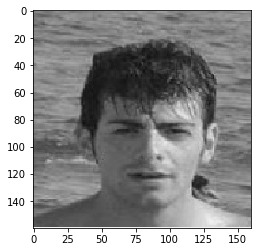

In [190]:
predictoneimage_cnn(model, 'eldebak2.JPG')

Age Range Percentages:


[('[15 - 20)', 48.07961285114288),
 ('[35 - 40)', 17.287442088127136),
 ('[40 - 45)', 17.154525220394135)]

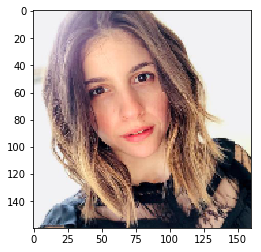

In [141]:
predictoneimage_cnn(model, 'florencia_test.JPG')

Age Range Percentages:


[('[15 - 20)', 56.893861293792725),
 ('[40 - 45)', 24.411270022392273),
 ('[45 - 50)', 4.245204105973244)]

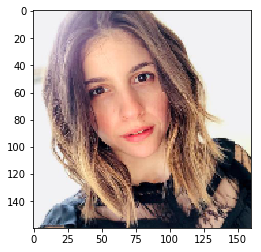

In [188]:
predictoneimage_cnn(model, 'florencia_test.JPG')

Age Range Percentages:


[('[45 - 50)', 24.818384647369385),
 ('[30 - 35)', 23.211081326007843),
 ('[25 - 30)', 21.009372174739838)]

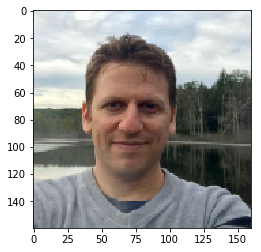

In [142]:
predictoneimage_cnn(model, 'omer_test.JPG')

Age Range Percentages:


[('[25 - 30)', 26.800042390823364),
 ('[45 - 50)', 23.897235095500946),
 ('[35 - 40)', 20.57691216468811)]

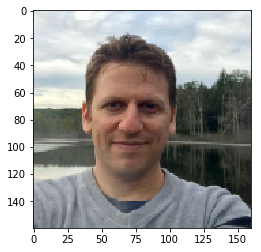

In [187]:
predictoneimage_cnn(model, 'omer_test.JPG')

Age Range Percentages:


[('[45 - 50)', 24.953262507915497),
 ('[25 - 30)', 23.935329914093018),
 ('[30 - 35)', 14.04971033334732)]

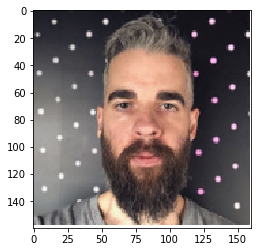

In [186]:
predictoneimage_cnn(model, 'maks_test.JPG')

Age Range Percentages:


[('[45 - 50)', 37.94935345649719),
 ('[35 - 40)', 30.21010458469391),
 ('[40 - 45)', 10.855114459991455)]

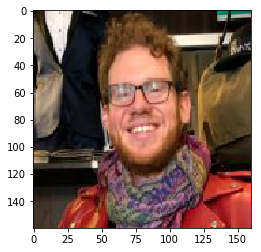

In [178]:
predictoneimage_cnn(model, 'ran_test.JPG')

Age Range Percentages:


[('[35 - 40)', 31.87013268470764),
 ('[15 - 20)', 20.28428018093109),
 ('[20 - 25)', 18.00200641155243)]

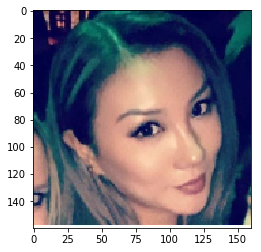

In [177]:
predictoneimage_cnn(model, 'fei_test.JPG')

Age Range Percentages:


[('[20 - 25)', 49.5318204164505),
 ('[25 - 30)', 15.468065440654755),
 ('[15 - 20)', 10.502088814973831)]

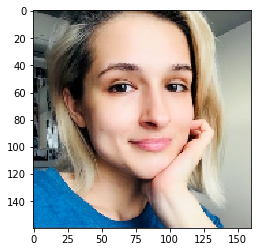

In [185]:
predictoneimage_cnn(model, 'natalie_test.JPG')

Age Range Percentages:


[('[55 - 60)', 44.456830620765686),
 ('[35 - 40)', 20.76714187860489),
 ('[25 - 30)', 8.926425874233246)]

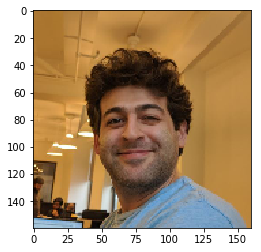

In [184]:
predictoneimage_cnn(model, 'alex2.JPG')

Age Range Percentages:


[('[55 - 60)', 35.466718673706055),
 ('[30 - 35)', 19.206485152244568),
 ('[35 - 40)', 12.443659454584122)]

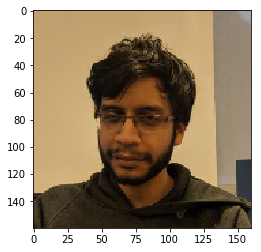

In [183]:
predictoneimage_cnn(model, 'anmol2.JPG')

Age Range Percentages:


[('[25 - 30)', 61.92600131034851),
 ('[45 - 50)', 9.23505574464798),
 ('[50 - 55)', 6.726429611444473)]

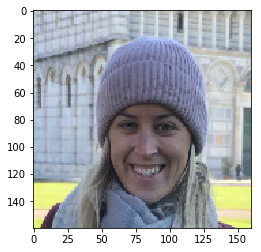

In [182]:
predictoneimage_cnn(model, 'sam_test.JPG')

Age Range Percentages:


[('[45 - 50)', 30.12433648109436),
 ('[30 - 35)', 24.705368280410767),
 ('[25 - 30)', 15.368461608886719)]

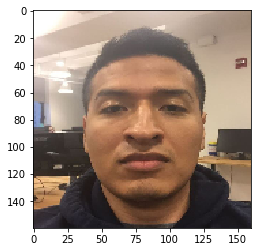

In [213]:
predictoneimage_cnn(model, 'miguel_test.JPG')

In [14]:
model = load_model('model2.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


# Demo Testing

Age Range Percentages:


[('[45 - 50)', 40.49031138420105),
 ('[40 - 45)', 27.933990955352783),
 ('[70 - 80)', 14.38666582107544)]

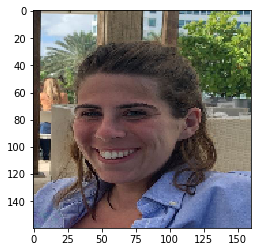

In [27]:
predictoneimage_cnn(model, 'demo.jpg')